## Imports

In this code cell, we import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import pandas as pd

## Linear Regression with Gradient Descent

This section explores the implementation of linear regression using gradient descent in Python.

**1. Linear Regression Model**

Linear regression is a supervised learning algorithm that models the relationship between a dependent variable (y) and one or more independent variables (x) using a linear equation:


y_hat = w1 * x + w0


where:

* `y_hat`: Predicted value of the dependent variable
* `x`: Independent variable(s)
* `w1`: Slope of the line
* `w0`: Y-intercept

The goal is to find the optimal values of `w1` and `w0` that minimize the difference between the predicted values (`y_hat`) and the actual values (`y`) of the dependent variable.

**2. Mean Squared Error (MSE) Loss Function**

A common measure of this difference is the Mean Squared Error (MSE) loss function

###### MSE = (1/n) * Σ((y_hat - y)^2)


where:

* `n`: Number of data points

The MSE calculates the average squared difference between the predicted and actual values. During training, we aim to minimize this loss function to improve the model's accuracy.

**3. Gradient Descent Algorithm**

Gradient descent is an iterative optimization algorithm used to minimize a function (like the MSE loss function). It works by repeatedly adjusting the model parameters (`w1` and `w0`) in the direction of steepest descent, which leads to a decrease in the loss function.

The update rule for gradient descent is:

where:

* `parameter_new`: Updated value of the parameter
* `parameter_old`: Current value of the parameter
* `learning_rate`: Controls the step size during updates (a small value prevents overshooting)
* `gradient`: Slope of the loss function with respect to the parameter (indicates the direction of steepest descent)



#### Gradients for Linear Regression with MSE Loss:
 
##### Gradient for w0:

Taking the partial derivative of the MSE loss function with respect to w0 (denoted by ∂MSE/∂w0), we get:

###### ∂MSE/∂w0 = (2/n) * Σ(y_hat - y)

##### Gradient for w1:

Taking the partial derivative of the MSE loss function with respect to w1 (denoted by ∂MSE/∂w1), we get:

###### ∂MSE/∂w1 = (2/n) * Σ(x * (y_hat - y))


In [2]:
class LinearRegression:
    def __init__(self, w0=None, w1=None):
        if w0 is None and w1 is None:
            self.w0 = np.random.randn()
            self.w1 = np.random.randn()
    
    def fit(self, x, y, epochs=100, lr=0.1, return_weights=False):
        
        for i in range(epochs):
            y_hat = self.predict(x)
            loss = self.loss_function(y_hat, y)
            if loss <= 1e-10:
                print('Fit Compelete')
                break
            w0_grad = 2 * np.mean(y_hat - y)
            w1_grad = 2 * np.mean(x * (y_hat - y))

            self.w0 -= lr * w0_grad
            self.w1 -= lr * w1_grad
            
        if return_weights:
            return w0, w1

    def predict(self, x):
        return self.w1*x + self.w0

    def loss_function(self, y_hat, y):
        return np.mean((y_hat - y) ** 2)
    

In [3]:
# created a regression problem with sklearn make_regression
x, y = make_regression(n_samples=100, n_features=1, random_state=98)
x, y = x.squeeze(), y.squeeze()

In [4]:
linear_regression = LinearRegression()
linear_regression.fit(x, y, epochs=500, lr=0.2)

Fit Compelete


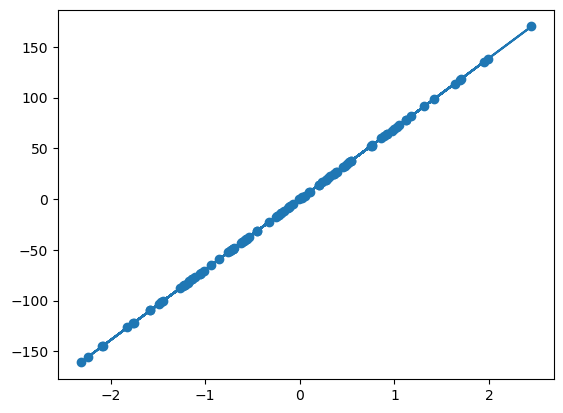

In [5]:
plt.scatter(x, y)
plt.plot(x, linear_regression.predict(x))